In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from data.ffs.readParameters import readParametersFromFileName
parameterDef = {'name': str, 're': float, 'Lo': float, 'Ho': float}

In [12]:
from upt.datasets.ffs_dataset import ffsDataset

# crop_values= [[-6, -2], [12, 2]]
crop_values= [[-2, -2], [2, 2]]

xMin = crop_values[0][0]
xMax = crop_values[1][0]

# num_test_inputs  = 4096
# num_test_outputs = 4096
# num_train_inputs  = num_test_inputs 
# num_train_outputs = num_test_outputs

test_hr_dataset = ffsDataset(
    root="./data/ffs/preprocessed",
    # how many inputs to use for training
    # num_inputs=float("inf"),
    num_inputs=10000,
    # how many outputs to use for training
    # num_outputs=float("inf"),
    num_outputs=10000,
    # mode
    mode="test",
    crop_values=crop_values,
)
from torch.utils.data import DataLoader
from upt.collators.ffs_collator import ffsCollator

# get test sample
test_dataloader = DataLoader(
    dataset=test_hr_dataset,
    batch_size=1,
    collate_fn=ffsCollator(num_supernodes=512, deterministic=True),
)
data = [d for d in test_dataloader]

In [17]:
num_test_inputs  = 4096
num_test_outputs = 4096
# num_train_inputs  = 8192
# num_train_outputs = 16000

num_train_inputs  = num_test_inputs 
num_train_outputs = num_test_outputs

crop_values= [[-3, -2], [3, 2]]

# initialize dataset
train_dataset = ffsDataset(
    root="./data/ffs/preprocessed600",
    # how many inputs to use for training
    # num_inputs=float("inf"),
    num_inputs=num_train_inputs,
    # how many outputs to use for training
    # num_outputs=float("inf"),
    num_outputs=num_train_outputs,
    # mode
    mode="train",
    # crop
    crop_values= crop_values,
)

In [18]:
# batch = data[2]
batch = train_dataset[0]

# input_pos = test_hr_dataset.denormalize_pos(batch['input_pos'])
# input_feat = test_hr_dataset.denormalize_sdf(batch['input_feat'])
# target_feat = test_hr_dataset.denormalize_feat(batch['target_feat'])
input_pos = batch['input_pos']
input_feat = batch['input_feat']
target_feat = batch['target_feat']
# parameterDict = readParametersFromFileName(batch['name'][0], parameterDef)
# re = parameterDict['re']
# Lo = parameterDict['Lo']
# Ho = parameterDict['Ho']

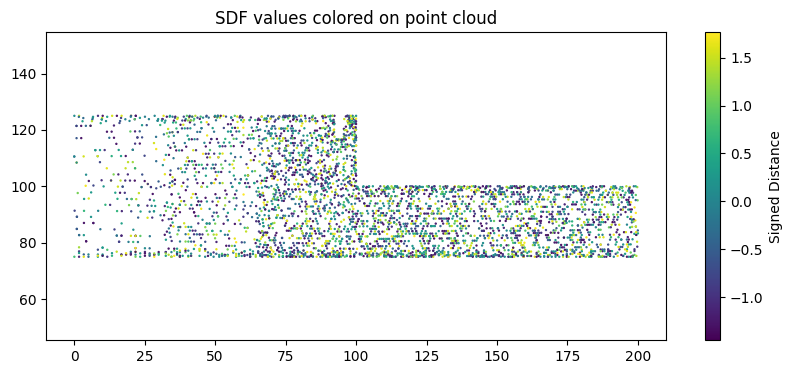

In [19]:
import matplotlib.pyplot as plt
var = target_feat[:,0]
# Visualize
plt.figure(figsize=(10, 4))
plt.scatter(input_pos[:, 0], input_pos[:, 1], c=var, s=0.5)
plt.colorbar(label="Signed Distance")
plt.axis("equal")
plt.title("SDF values colored on point cloud")
plt.show()

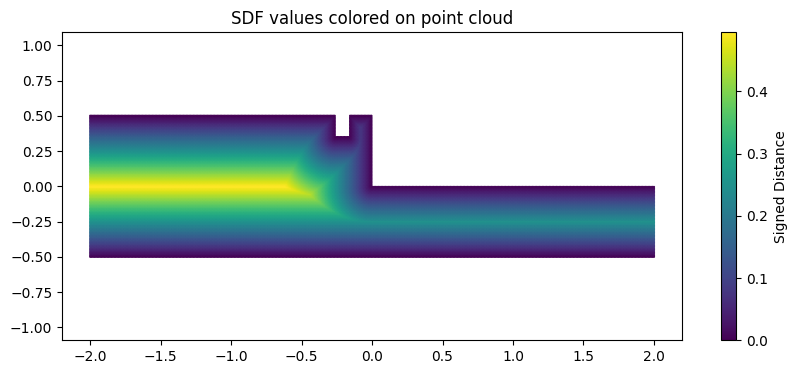

In [10]:
import matplotlib.pyplot as plt

pointCloud = evalPointCloud(
    xMin=xMin,
    xMax=xMax,
    Ho=Ho, Lo=Lo,
    totalPoints=40000
)

# Visualize
plt.figure(figsize=(10, 4))
plt.scatter(pointCloud['input_pos'][:, 0], pointCloud['input_pos'][:, 1], c=pointCloud['input_feat'], s=0.5)
plt.colorbar(label="Signed Distance")
plt.axis("equal")
plt.title("SDF values colored on point cloud")
plt.show()
# ['892.50000000000591', '0.87000000000000477', '0.33700000000000008']


In [3]:
directory = './data/ffs/preprocessed/DP1_718,18181818181733-0,43636363636363645-0,10181818181818182/'
mesh_tensor = torch.load('/workspace/upt-tutorial/data/simulation/case_000000/00000000_mesh.th', weights_only=True)

In [11]:
sdf = torch.load(uri.replace('CSV', 'preprocessed').replace('.csv', '/') + 'mesh_sdf.th', weights_only=True)
mesh_pos = torch.load(uri.replace('CSV', 'preprocessed').replace('.csv', '/') + 'mesh_points.th', weights_only=True)


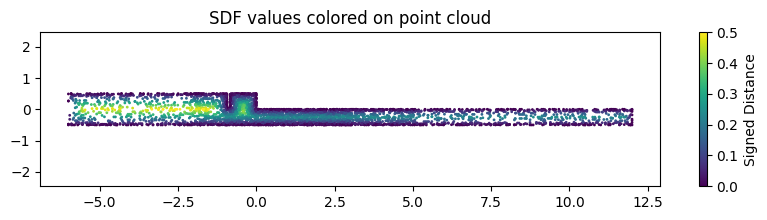

In [ ]:
# Visualize
plt.figure(figsize=(10, 2))
plt.scatter(input_pos[:, 0], input_pos[:, 1], c=input_feat, s=1)
plt.colorbar(label="Signed Distance")
plt.axis("equal")
plt.title("SDF values colored on point cloud")
plt.show()

In [9]:
import torch
# /workspace/upt-tutorial/data/ffs/preprocessed/coords_norm.th
                    #  ../data/ffs/preprocessed/coords_norm.th
# Load tensor data
directory = './data/ffs/preprocessed600/'
coords_norm = torch.load(directory + 'coords_norm.th', weights_only=True)
vars_norm = torch.load(directory + 'vars_norm.th', weights_only=True)

In [ ]:
import os
from pathlib import Path
import torch
root = Path('./data/ffs/preprocessed600/')

uris = []
for name in sorted(os.listdir(root)):
    sampleDir = root / name
    if sampleDir.is_dir():
        uris.append(sampleDir)

sum_vars = 0.0
sum_sq_vars = 0.0
total_samples = 0
for uri in uris:
    sdf = torch.load(uri / 'mesh_sdf.th', weights_only=True)
    sum_vars += sdf.sum()
    sum_sq_vars += (sdf ** 2).sum()
    total_samples += len(sdf)
mean_vars = sum_vars / total_samples
std_vars = torch.sqrt((sum_sq_vars / total_samples) - (mean_vars ** 2))
other = torch.load(root/'vars_norm.th', weights_only=True)
other['mean'][-1] = mean_vars
other['std'][-1] = std_vars
torch.save(other, root/"vars_norm.th")


In [36]:
from pathlib import Path

root = Path('./data/ffs/preprocessed/')

for oldName in sorted(root.iterdir()):
    if oldName.is_dir():
        newName = oldName.name.replace('-', '_')
        newPath = oldName.parent / newName
        oldName.rename(newPath)

In [11]:
directory = './data/ffs/preprocessed600/DP1_528,24999999999852_0,52999999999999914_0,10033333333333334/'
input_pos = torch.load(directory + 'mesh_points.th', weights_only=True)
input_feat = torch.load(directory + 'mesh_sdf.th', weights_only=True)
u = torch.load(directory + 'u.th', weights_only=True)
v = torch.load(directory + 'v.th', weights_only=True)
p = torch.load(directory + 'p.th', weights_only=True)

# parameterDict = readParametersFromFileName(batch['name'][0], parameterDef)
# re = parameterDict['re']
# Lo = parameterDict['Lo']
# Ho = parameterDict['Ho']

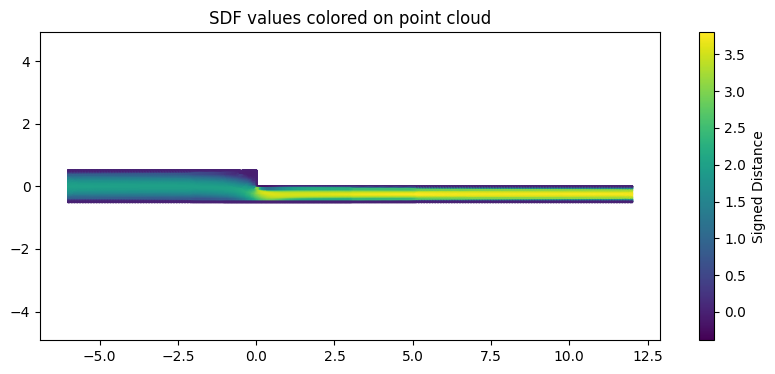

In [12]:
import matplotlib.pyplot as plt
var = target_feat[:,0]
# Visualize
plt.figure(figsize=(10, 4))
plt.scatter(input_pos[:, 0], input_pos[:, 1], c=u, s=0.5)
plt.colorbar(label="Signed Distance")
plt.axis("equal")
plt.title("SDF values colored on point cloud")
plt.show()